### OCI Data Science - Useful Tips
Everything stored in the <span style="background-color: #d5d8dc ">/home/datascience</span> folder is now stored on your block volume drive. The <span style="background-color: #d5d8dc ">ads-examples</span> folder has moved outside of your working space. Notebook examples are now accessible through a Launcher tab "Notebook Examples" button.
<details>
<summary><font size="2">1. Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">2. OCI Configuration and Key Files Set Up</font></summary><p>Follow the instructions in the getting-started notebook. That notebook is accessible via the "Getting Started" Launcher tab button.</p>
</details>
<details>
<summary><font size="2">3. Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">4. Typical Cell Imports and Settings</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import MLData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">5. Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

# 

# Environment 

In [1]:
import os
import sys 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("./Data/air_status.csv")

In [3]:
train2 = pd.read_csv("./Data/air_status.csv")

In [4]:
train.head(2)

,SITE_ID,DATEON,DATEOFF,TSO4,TNO3,TNH4,Ca,Mg,Na,K,...,WSO2,TOTAL_SO2,TOTAL_NO3,FLOW_VOLUME,VALID_HOURS,COMMENT_CODES,STD2LOCAL_CF,TEMP_SOURCE,QA_CODE,UPDATE_DATE
0,CON186,2003-06-17,2003-06-24,1.6460,2.6535,1.0740,0.1625,0.0440,0.1980,0.0609,...,0.3286,0.3544,6.0754,36.2704,168,NaN,1.196241,sa,3,2004-02-02
1,CON186,2003-06-24,2003-07-01,1.0356,0.6297,0.4035,0.2331,0.0394,0.1455,0.0444,...,0.4054,0.4466,4.0244,37.0314,167,NaN,1.227204,sa,3,2004-02-02


In [5]:
test = pd.read_csv("./Data/test.csv")

In [6]:
test.head(2)

,SITE_ID,DATEON,DATEOFF,TSO4,TNO3,TNH4,Ca,Mg,Na,K,...,NHNO3,WSO2,TOTAL_SO2,FLOW_VOLUME,VALID_HOURS,COMMENT_CODES,STD2LOCAL_CF,TEMP_SOURCE,QA_CODE,UPDATE_DATE
0,CON186,2003-08-26,2003-09-02,2.0949,1.3105,0.6974,0.321,0.0709,0.2831,0.0703,...,6.0538,0.7150,0.8077,36.8374,166,T4,1.22875,sa,3,2004-02-02
1,CON186,2004-04-27,2004-05-11,1.5278,1.8541,0.3870,0.501,0.1011,0.3582,0.0891,...,2.1959,0.4824,0.5314,72.5240,327,G12,1.20363,sa,3,2008-07-18


In [16]:
df=pd.concat([train,test],axis=0,sort=False)

In [17]:
cat_cols = ['SITE_ID','QA_CODE','TEMP_SOURCE']

In [18]:
TARGET_COL = 'TOTAL_NO3'

In [10]:
codes = pd.read_csv("./Data/codes.csv")
site = pd.read_csv("./Data/site.csv")
dd = pd.read_csv("./Data/data_dictionary.csv")

In [11]:
site

,SITE_ID,location
0,PIN414,Pinnacles NM
1,SEK430,Sequoia NP - Ash Mountain
2,DEV412,Death Valley NM
3,SEK402,Sequoia NP - Lookout Pt
4,JOT403,Joshua Tree NP
5,YOS404,Yosemite NP - Turtleback Dome
6,CON186,Converse Station
7,LAV410,Lassen Volcanic NP


In [11]:
dd.head(5)

,COLUMN_NAME,UNIT,DATA_TYPE,DESCRIPTION
0,SITE_ID,NaN,CHAR,Site identification code. See the file site.cs...
1,DATEON,NaN,DATE,"Date the sample collection began, Local Standa..."
2,DATEOFF,NaN,DATE,"Date the sample collection ended, Local Standa..."
3,TSO4,ug/m^3,NUMBER,Sulfate (SO4) concentration from Teflon filter...
4,TNO3,ug/m^3,NUMBER,Nitrate (NO3) concentration from Teflon filter...


In [12]:
codes.head(2)

,COLUMN_NAME,CODE,DESCRIPTION,VALID
0,%_F,!,X and U apply,V
1,%_F,#,Both U and L flags apply,V


In [19]:
df.head(3)

,SITE_ID,DATEON,DATEOFF,TSO4,TNO3,TNH4,Ca,Mg,Na,K,...,WSO2,TOTAL_SO2,TOTAL_NO3,FLOW_VOLUME,VALID_HOURS,COMMENT_CODES,STD2LOCAL_CF,TEMP_SOURCE,QA_CODE,UPDATE_DATE
0,CON186,2003-06-17,2003-06-24,1.6460,2.6535,1.0740,0.1625,0.0440,0.1980,0.0609,...,0.3286,0.3544,6.0754,36.2704,168,NaN,1.196241,sa,3,2004-02-02
1,CON186,2003-06-24,2003-07-01,1.0356,0.6297,0.4035,0.2331,0.0394,0.1455,0.0444,...,0.4054,0.4466,4.0244,37.0314,167,NaN,1.227204,sa,3,2004-02-02
2,CON186,2003-07-01,2003-07-08,1.5335,1.2570,0.4836,0.2185,0.0759,0.3440,0.1697,...,0.5119,0.5684,5.7479,37.9842,171,NaN,1.228530,sa,3,2004-02-02


In [20]:
df=pd.get_dummies(df,columns=cat_cols)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7155 entries, 0 to 995
Data columns (total 34 columns):
DATEON            7155 non-null object
DATEOFF           7155 non-null object
TSO4              7155 non-null float64
TNO3              7155 non-null float64
TNH4              7155 non-null float64
Ca                5932 non-null float64
Mg                5932 non-null float64
Na                5932 non-null float64
K                 5928 non-null float64
Cl                4858 non-null float64
NSO4              7155 non-null float64
NHNO3             7155 non-null float64
WSO2              7155 non-null float64
TOTAL_SO2         7155 non-null float64
TOTAL_NO3         6159 non-null float64
FLOW_VOLUME       7155 non-null float64
VALID_HOURS       7155 non-null int64
COMMENT_CODES     2313 non-null object
STD2LOCAL_CF      7155 non-null float64
UPDATE_DATE       7155 non-null object
SITE_ID_CON186    7155 non-null uint8
SITE_ID_DEV412    7155 non-null uint8
SITE_ID_JOT403    7155 n

In [22]:
import seaborn as sns

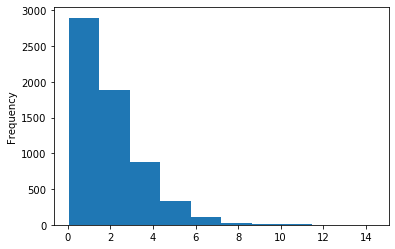

In [23]:
df[TARGET_COL].plot(kind='hist')

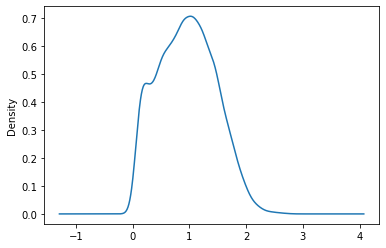

In [24]:
np.log1p(train[TARGET_COL]).plot(kind='density')

In [25]:
df[TARGET_COL]=np.log1p(df[TARGET_COL])

In [26]:
df['DATEON']=pd.to_datetime(df['DATEON'])
df['DATEOFF']=pd.to_datetime(df['DATEOFF'])

In [27]:
df['week']=df['DATEON'].dt.week
df['mnth']=df['DATEON'].dt.month

In [28]:
# train['week'].value_counts()[:10].plot(kind='bar')

In [29]:
df['COMMENT_CODES'].isnull().sum()

4842

In [67]:
# num_cols = [col for col in train.select_dtypes(include=['float64','int64']).columns if col not in [TARGET_COL]]
# num_cols

In [30]:
# train['COMMENT_CODES'].value_counts()[:5].plot(kind='bar') 

In [31]:
# def encode(x):
#     if x in ['T04','12']:
#         return x
#     else:
#         return "OT"

In [32]:
# train['comment_cat'] = train['COMMENT_CODES'].apply(lambda x: encode(x))

In [33]:
df['code_miss'] = np.where(df['COMMENT_CODES'].isnull(), 1, 0)

In [34]:
df['code_miss'].value_counts()

1    4842
0    2313
Name: code_miss, dtype: int64

In [35]:
# train = pd.get_dummies(train,columns=['comment_cat'])

In [36]:
# test[num_cols].isnull().sum()

In [37]:
num_cols = [col for col in df.select_dtypes(include=['uint8','float64','int64']).columns if col not in [TARGET_COL]]
num_cols

['TSO4',
 'TNO3',
 'TNH4',
 'Ca',
 'Mg',
 'Na',
 'K',
 'Cl',
 'NSO4',
 'NHNO3',
 'WSO2',
 'TOTAL_SO2',
 'FLOW_VOLUME',
 'VALID_HOURS',
 'STD2LOCAL_CF',
 'SITE_ID_CON186',
 'SITE_ID_DEV412',
 'SITE_ID_JOT403',
 'SITE_ID_LAV410',
 'SITE_ID_PIN414',
 'SITE_ID_SEK402',
 'SITE_ID_SEK430',
 'SITE_ID_YOS404',
 'QA_CODE_1',
 'QA_CODE_3',
 'TEMP_SOURCE_mo',
 'TEMP_SOURCE_sa',
 'TEMP_SOURCE_se',
 'TEMP_SOURCE_wk',
 'week',
 'mnth',
 'code_miss']

In [38]:
# plt.figure(figsize=(16,10))
# sns.heatmap(train[num_cols].corr(),annot=True)

In [39]:
train = df[:train.shape[0]]
test = df[train.shape[0]:]

In [40]:
train.shape ,test.shape

((6159, 37), (996, 37))

In [41]:
train[num_cols].isnull().sum()

TSO4                 0
TNO3                 0
TNH4                 0
Ca                1223
Mg                1223
Na                1223
K                 1227
Cl                2297
NSO4                 0
NHNO3                0
WSO2                 0
TOTAL_SO2            0
FLOW_VOLUME          0
VALID_HOURS          0
STD2LOCAL_CF         0
SITE_ID_CON186       0
SITE_ID_DEV412       0
SITE_ID_JOT403       0
SITE_ID_LAV410       0
SITE_ID_PIN414       0
SITE_ID_SEK402       0
SITE_ID_SEK430       0
SITE_ID_YOS404       0
QA_CODE_1            0
QA_CODE_3            0
TEMP_SOURCE_mo       0
TEMP_SOURCE_sa       0
TEMP_SOURCE_se       0
TEMP_SOURCE_wk       0
week                 0
mnth                 0
code_miss            0
dtype: int64

In [42]:
missing_cols = ['Ca','Mg','Na','K','Cl']

In [43]:
for col in missing_cols:
    train[col] = train[col].fillna(train2.groupby(["SITE_ID"])[col].transform('median'))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
# train['TEMP_SOURCE']=train2['TEMP_SOURCE']
# train = pd.get_dummies(train,columns=['TEMP_SOURCE'])
test[num_cols].isnull().sum()

TSO4              0
TNO3              0
TNH4              0
Ca                0
Mg                0
Na                0
K                 0
Cl                0
NSO4              0
NHNO3             0
WSO2              0
TOTAL_SO2         0
FLOW_VOLUME       0
VALID_HOURS       0
STD2LOCAL_CF      0
SITE_ID_CON186    0
SITE_ID_DEV412    0
SITE_ID_JOT403    0
SITE_ID_LAV410    0
SITE_ID_PIN414    0
SITE_ID_SEK402    0
SITE_ID_SEK430    0
SITE_ID_YOS404    0
QA_CODE_1         0
QA_CODE_3         0
TEMP_SOURCE_mo    0
TEMP_SOURCE_sa    0
TEMP_SOURCE_se    0
TEMP_SOURCE_wk    0
week              0
mnth              0
code_miss         0
dtype: int64

In [45]:
# train.drop(columns=['Week'],inplace=True)

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score

X_train,X_val,y_train,y_val = train_test_split(train[num_cols],train2[TARGET_COL],test_size=0.15,random_state=42)
X_train.shape , X_val.shape

((5235, 32), (924, 32))

In [59]:
# train[num_cols].isnull().sum()
def sse(actuals,preds):
    return np.sum((actuals-preds)**2)

In [60]:
rf = RandomForestRegressor(random_state=42,max_depth=4)
rf.fit(X_train,y_train)
pred = rf.predict(X_val)
print("RMSE is: ",sse(y_val,pred))

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE is:  97.57555238682716


In [61]:
from xgboost import XGBRegressor
xgb =XGBRegressor(n_estimators=20 ,max_depth=3)
xgb.fit(X_train,y_train)
pred = xgb.predict(X_val)
print("RMSE is: ",sse(y_val,pred))

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:27:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE is:  139.3236560785337


In [62]:
from lightgbm import LGBMRegressor
lgb =LGBMRegressor(n_estimators = 20, max_depth=3)
lgb.fit(X_train,y_train)
pred = lgb.predict(X_val)
print("RMSE is: ",sse(y_val,pred))

RMSE is:  115.82504871109059


In [65]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_val)
print("RMSE is: ",sse(y_val,pred))

RMSE is:  2.2193386489456857e-06


In [64]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=4)
dtree.fit(X_train,y_train)
pred = dtree.predict(X_val)
print("RMSE is: ",sse(y_val,pred))

RMSE is:  162.05213726896602


In [66]:
X_train.columns

Index(['TSO4', 'TNO3', 'TNH4', 'Ca', 'Mg', 'Na', 'K', 'Cl', 'NSO4', 'NHNO3',
       'WSO2', 'TOTAL_SO2', 'FLOW_VOLUME', 'VALID_HOURS', 'STD2LOCAL_CF',
       'SITE_ID_CON186', 'SITE_ID_DEV412', 'SITE_ID_JOT403', 'SITE_ID_LAV410',
       'SITE_ID_PIN414', 'SITE_ID_SEK402', 'SITE_ID_SEK430', 'SITE_ID_YOS404',
       'QA_CODE_1', 'QA_CODE_3', 'TEMP_SOURCE_mo', 'TEMP_SOURCE_sa',
       'TEMP_SOURCE_se', 'TEMP_SOURCE_wk', 'week', 'mnth', 'code_miss'],
      dtype='object')

In [67]:
best_model = lr
pred = lr.predict(train[num_cols])
print("RMSE is: ",sse(train2[TARGET_COL],pred))

RMSE is:  1.4895766312093197e-05


In [68]:
best_model = lr
test_preds = lr.predict(test[num_cols])

In [69]:
test_preds.shape

(996,)

In [70]:
test.shape

(996, 37)

In [71]:
test2 = pd.read_csv("./Data/test.csv")
test2.shape

(996, 22)

In [72]:
res=pd.DataFrame({"SITE_ID":test2["SITE_ID"],"DATEON":test2["DATEON"],TARGET_COL: test_preds})
res.head()

,SITE_ID,DATEON,TOTAL_NO3
0,CON186,2003-08-26,7.268051
1,CON186,2004-04-27,4.015095
2,CON186,2004-07-27,5.217186
3,CON186,2007-12-18,0.629676
4,CON186,2010-10-12,0.995219


In [73]:
res.to_csv("submission_lr.csv",index=False)